In [98]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from sklearn.model_selection import train_test_split 
import time
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import pickle
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier   
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import warnings


In [2]:
dataset=pd.read_csv('credit_risk_dataset.csv')
dataset

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# Data Cleaning
# Checking for special characters

In [3]:
import re

dataset = pd.DataFrame(dataset)

# Define a regular expression for special characters
special_char_pattern = r'[^a-zA-Z0-9.\s]'

# Iterate over each column to check for special characters
for column in dataset.columns:
    print(f"Checking column: {column}")
    
    # Convert the column to string to handle non-string values
    contains_special_chars = dataset[column].astype(str).str.contains(special_char_pattern, regex=True)
    
    # Print the rows where special characters are found
    if contains_special_chars.any():
        print(f"Rows with special characters in {column}:")
        print(df[contains_special_chars])
    else:
        print(f"No special characters found in {column}.")
    print()  # For better readability between columns

Checking column: person_age
No special characters found in person_age.

Checking column: person_income
No special characters found in person_income.

Checking column: person_home_ownership
No special characters found in person_home_ownership.

Checking column: person_emp_length
No special characters found in person_emp_length.

Checking column: loan_intent
No special characters found in loan_intent.

Checking column: loan_grade
No special characters found in loan_grade.

Checking column: loan_amnt
No special characters found in loan_amnt.

Checking column: loan_int_rate
No special characters found in loan_int_rate.

Checking column: loan_status
No special characters found in loan_status.

Checking column: loan_percent_income
No special characters found in loan_percent_income.

Checking column: cb_person_default_on_file
No special characters found in cb_person_default_on_file.

Checking column: cb_person_cred_hist_length
No special characters found in cb_person_cred_hist_length.



# Checking for null values 

In [4]:
dataset.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [5]:
print(dataset['person_emp_length'].isnull().sum())

895


In [6]:
# Calculate the mean of 'person_emp_length', ignoring NaN values
mean_emp_length = dataset['person_emp_length'].mean()
mean_emp_length

np.float64(4.789686296787225)

In [7]:
# Replace NaN values with the mean
dataset['person_emp_length'].fillna(mean_emp_length, inplace=True)
# Verify that there are no more missing values in the column
print(dataset['person_emp_length'].isnull().sum())

0


In [8]:
print(dataset['loan_int_rate'].isnull().sum())

3116


In [9]:
# Calculate the mean of 'person_emp_length', ignoring NaN values
mean_int_rate = dataset['loan_int_rate'].mean()
# Replace NaN values with the mean
dataset['loan_int_rate'].fillna(mean_int_rate, inplace=True)
# Verify that there are no more missing values in the column
print(dataset['loan_int_rate'].isnull().sum())

0


# Checking for zero values

In [10]:
dataset = pd.DataFrame(dataset)

# Iterate over each column to check for the value 0
for column in dataset.columns:
    print(f"Checking column: {column}")
    
    # Check if the column contains any zeros
    contains_zero = dataset[column] == 0
    
    # Print the rows where the value is zero
    if contains_zero.any():
        print(f"Rows with zero in {column}:")
        #print(df[contains_zero])
    else:
        print(f"No zero values found in {column}.")
    print()  # For better readability between columns

Checking column: person_age
No zero values found in person_age.

Checking column: person_income
No zero values found in person_income.

Checking column: person_home_ownership
No zero values found in person_home_ownership.

Checking column: person_emp_length
Rows with zero in person_emp_length:

Checking column: loan_intent
No zero values found in loan_intent.

Checking column: loan_grade
No zero values found in loan_grade.

Checking column: loan_amnt
No zero values found in loan_amnt.

Checking column: loan_int_rate
No zero values found in loan_int_rate.

Checking column: loan_status
Rows with zero in loan_status:

Checking column: loan_percent_income
Rows with zero in loan_percent_income:

Checking column: cb_person_default_on_file
No zero values found in cb_person_default_on_file.

Checking column: cb_person_cred_hist_length
No zero values found in cb_person_cred_hist_length.



# Replacing zero values with mean values

In [11]:
dataset['person_emp_length'] = dataset['person_emp_length'].replace(0.0, mean_emp_length)

In [12]:
calculated_Value= (dataset['loan_amnt'] / dataset['person_income'])

# Step 2: Replace zero values in 'loan_percent_income' with the recalculated values
dataset.loc[dataset['loan_percent_income'] == 0.0, 'loan_percent_income'] = calculated_Value

In [13]:
# Convert person_emp_length from years to months
dataset['person_emp_length'] = dataset['person_emp_length'] * 12
dataset['cb_person_cred_hist_length'] = dataset['cb_person_cred_hist_length'] * 12

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


# Changing categorical values to numerical

In [15]:
pd.get_dummies(dataset)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,22,59000,1476.0,35000,16.02,1,0.59,36,False,False,...,False,False,False,False,True,False,False,False,False,True
1,21,9600,60.0,1000,11.14,0,0.10,24,False,False,...,False,False,True,False,False,False,False,False,True,False
2,25,9600,12.0,5500,12.87,1,0.57,36,True,False,...,False,False,False,True,False,False,False,False,True,False
3,23,65500,48.0,35000,15.23,1,0.53,24,False,False,...,False,False,False,True,False,False,False,False,True,False
4,24,54400,96.0,35000,14.27,1,0.55,48,False,False,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,12.0,5800,13.16,0,0.11,360,True,False,...,False,False,False,True,False,False,False,False,True,False
32577,54,120000,48.0,17625,7.49,0,0.15,228,True,False,...,False,True,False,False,False,False,False,False,True,False
32578,65,76000,36.0,35000,10.99,1,0.46,336,False,False,...,False,False,True,False,False,False,False,False,True,False
32579,56,150000,60.0,15000,11.48,0,0.10,312,True,False,...,False,False,True,False,False,False,False,False,True,False


In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [17]:
dataset['loan_intent'].value_counts()

loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64

In [18]:
dataset['loan_grade'].value_counts()

loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: count, dtype: int64

# Label encoding for categorical values

In [19]:
# Map person_home_ownership categories to integers
home_ownership_map = {'RENT': 0, 'OWN': 1, 'MORTGAGE': 2, 'OTHER': 3}
dataset['person_home_ownership'] = dataset['person_home_ownership'].map(home_ownership_map)

loan_intent={'EDUCATION':0,'MEDICAL':1,'VENTURE':2,'PERSONAL':3,'DEBTCONSOLIDATION':4,'HOMEIMPROVEMENT':5}
dataset['loan_intent']=dataset['loan_intent'].map(loan_intent)

loan_grade={'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6}
dataset['loan_grade']=dataset['loan_grade'].map(loan_grade)

# Convert cb_person_default_on_file to binary values (e.g., 'Y' = 1, 'N' = 0)
dataset['cb_person_default_on_file'] = dataset['cb_person_default_on_file'].map({'Y': 1, 'N': 0})

# Check the result
dataset.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,0,1476.0,3,3,35000,16.02,1,0.59,1,36
1,21,9600,1,60.0,0,1,1000,11.14,0,0.10,0,24
2,25,9600,2,12.0,1,2,5500,12.87,1,0.57,0,36
3,23,65500,0,48.0,1,2,35000,15.23,1,0.53,0,24
4,24,54400,0,96.0,1,2,35000,14.27,1,0.55,1,48


In [20]:
dataset['person_emp_length'] = dataset['person_emp_length'].astype(int)

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  int64  
 3   person_emp_length           32581 non-null  int64  
 4   loan_intent                 32581 non-null  int64  
 5   loan_grade                  32581 non-null  int64  
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  int64  
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 3.0 MB


In [22]:
dataset

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,0,1476,3,3,35000,16.02,1,0.59,1,36
1,21,9600,1,60,0,1,1000,11.14,0,0.10,0,24
2,25,9600,2,12,1,2,5500,12.87,1,0.57,0,36
3,23,65500,0,48,1,2,35000,15.23,1,0.53,0,24
4,24,54400,0,96,1,2,35000,14.27,1,0.55,1,48
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,2,12,3,2,5800,13.16,0,0.11,0,360
32577,54,120000,2,48,3,0,17625,7.49,0,0.15,0,228
32578,65,76000,0,36,5,1,35000,10.99,1,0.46,0,336
32579,56,150000,2,60,3,1,15000,11.48,0,0.10,0,312


# Renaming columns

In [23]:
# Renaming specific columns
dataset.rename(columns={'person_age': 'age', 
                   'person_income': 'income',
                   'person_emp_length':'emplength_month',
                   'person_home_ownership':'home_type',
                   'cb_person_default_on_file':'default_status',
                   'loan_amnt':'loan_amount' ,
                   'loan_int_rate':'interest_rate',
                   'cb_person_cred_hist_length':'credhist_month'     
                  }, inplace=True)

In [24]:
dataset

,age,income,home_type,emplength_month,loan_intent,loan_grade,loan_amount,interest_rate,loan_status,loan_percent_income,default_status,credhist_month
0,22,59000,0,1476,3,3,35000,16.02,1,0.59,1,36
1,21,9600,1,60,0,1,1000,11.14,0,0.10,0,24
2,25,9600,2,12,1,2,5500,12.87,1,0.57,0,36
3,23,65500,0,48,1,2,35000,15.23,1,0.53,0,24
4,24,54400,0,96,1,2,35000,14.27,1,0.55,1,48
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,2,12,3,2,5800,13.16,0,0.11,0,360
32577,54,120000,2,48,3,0,17625,7.49,0,0.15,0,228
32578,65,76000,0,36,5,1,35000,10.99,1,0.46,0,336
32579,56,150000,2,60,3,1,15000,11.48,0,0.10,0,312


In [25]:
dataset = dataset.drop(columns=['loan_status'],axis=1)
dataset

,age,income,home_type,emplength_month,loan_intent,loan_grade,loan_amount,interest_rate,loan_percent_income,default_status,credhist_month
0,22,59000,0,1476,3,3,35000,16.02,0.59,1,36
1,21,9600,1,60,0,1,1000,11.14,0.10,0,24
2,25,9600,2,12,1,2,5500,12.87,0.57,0,36
3,23,65500,0,48,1,2,35000,15.23,0.53,0,24
4,24,54400,0,96,1,2,35000,14.27,0.55,1,48
...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,2,12,3,2,5800,13.16,0.11,0,360
32577,54,120000,2,48,3,0,17625,7.49,0.15,0,228
32578,65,76000,0,36,5,1,35000,10.99,0.46,0,336
32579,56,150000,2,60,3,1,15000,11.48,0.10,0,312


In [26]:
dataset.describe()

,age,income,home_type,emplength_month,loan_intent,loan_grade,loan_amount,interest_rate,loan_percent_income,default_status,credhist_month
count,32581.000000,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,0.914429,64.644793,2.238882,1.218195,9589.371106,11.011695,0.170204,0.176330,69.650533
std,6.348078,6.198312e+04,0.960858,43.997298,1.651290,1.166336,6322.086646,3.081605,0.106780,0.381106,48.660014
min,20.000000,4.000000e+03,0.000000,12.000000,0.000000,0.000000,500.000000,5.420000,0.000789,0.000000,24.000000
25%,23.000000,3.850000e+04,0.000000,36.000000,1.000000,0.000000,5000.000000,8.490000,0.090000,0.000000,36.000000
50%,26.000000,5.500000e+04,0.000000,57.000000,2.000000,1.000000,8000.000000,11.011695,0.150000,0.000000,48.000000
75%,30.000000,7.920000e+04,2.000000,84.000000,4.000000,2.000000,12200.000000,13.110000,0.230000,0.000000,96.000000
max,144.000000,6.000000e+06,3.000000,1476.000000,5.000000,6.000000,35000.000000,23.220000,0.830000,1.000000,360.000000


# Finding and removing outliers

In [27]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for 'person_income'
Q1 = dataset['income'].quantile(0.25)
Q3 = dataset['income'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound)
print(upper_bound)

-22550.0
140250.0


In [28]:
dataset = dataset[(dataset['income'] >= lower_bound) & (dataset['income'] <= upper_bound)]
dataset

,age,income,home_type,emplength_month,loan_intent,loan_grade,loan_amount,interest_rate,loan_percent_income,default_status,credhist_month
0,22,59000,0,1476,3,3,35000,16.02,0.59,1,36
1,21,9600,1,60,0,1,1000,11.14,0.10,0,24
2,25,9600,2,12,1,2,5500,12.87,0.57,0,36
3,23,65500,0,48,1,2,35000,15.23,0.53,0,24
4,24,54400,0,96,1,2,35000,14.27,0.55,1,48
...,...,...,...,...,...,...,...,...,...,...,...
32575,52,64500,0,57,0,1,5000,11.26,0.08,0,240
32576,57,53000,2,12,3,2,5800,13.16,0.11,0,360
32577,54,120000,2,48,3,0,17625,7.49,0.15,0,228
32578,65,76000,0,36,5,1,35000,10.99,0.46,0,336


In [29]:
dataset= dataset[dataset['emplength_month'] <1200]

In [30]:
dataset['age']>100

1        False
2        False
3        False
4        False
5        False
         ...  
32575    False
32576    False
32577    False
32578    False
32580    False
Name: age, Length: 31096, dtype: bool

In [31]:
dataset= dataset[dataset['age'] <100]

In [32]:
dataset.describe()

,age,income,home_type,emplength_month,loan_intent,loan_grade,loan_amount,interest_rate,loan_percent_income,default_status,credhist_month
count,31094.000000,31094.000000,31094.000000,31094.000000,31094.000000,31094.000000,31094.000000,31094.000000,31094.000000,31094.000000,31094.000000
mean,27.592944,58703.684569,0.888306,63.732971,2.228115,1.213707,9288.188236,10.997396,0.174309,0.175918,68.720396
std,6.149513,27519.902200,0.958018,41.629772,1.649671,1.163242,6036.567520,3.077618,0.107025,0.380757,48.086252
min,20.000000,4000.000000,0.000000,12.000000,0.000000,0.000000,500.000000,5.420000,0.010000,0.000000,24.000000
25%,23.000000,38000.000000,0.000000,36.000000,1.000000,0.000000,5000.000000,8.490000,0.090000,0.000000,36.000000
50%,26.000000,54000.000000,0.000000,57.000000,2.000000,1.000000,8000.000000,11.011695,0.150000,0.000000,48.000000
75%,30.000000,75000.000000,2.000000,84.000000,4.000000,2.000000,12000.000000,13.110000,0.230000,0.000000,96.000000
max,94.000000,140004.000000,3.000000,492.000000,5.000000,6.000000,35000.000000,23.220000,0.830000,1.000000,360.000000


# Model creation

In [33]:
independent=dataset[['age','income','emplength_month','loan_amount','interest_rate','loan_percent_income','home_type','loan_grade','loan_intent','credhist_month']]
dependent=dataset[['default_status']]

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(independent,dependent,test_size=0.3,random_state=0)

In [35]:
X_train

,age,income,emplength_month,loan_amount,interest_rate,loan_percent_income,home_type,loan_grade,loan_intent,credhist_month
7727,22,54500,72,7500,10.59,0.14,2,1,0,36
30937,39,45500,48,10000,16.29,0.22,0,3,3,180
26689,30,110000,48,12000,10.74,0.11,2,1,1,96
12982,24,74004,96,8000,15.21,0.11,2,3,4,36
20779,27,42000,12,5000,10.99,0.12,0,1,3,120
...,...,...,...,...,...,...,...,...,...,...
13322,22,90000,72,7000,7.14,0.08,1,0,2,48
20415,27,40000,84,13000,7.88,0.33,2,0,2,84
10039,23,40000,84,9250,16.07,0.23,0,3,0,24
10993,23,70572,96,14500,5.99,0.21,2,0,0,36


In [36]:
X_test

,age,income,emplength_month,loan_amount,interest_rate,loan_percent_income,home_type,loan_grade,loan_intent,credhist_month
26012,30,95000,168,5000,6.990000,0.05,2,0,2,120
27038,27,91800,48,25000,16.070000,0.23,2,3,1,108
10271,25,75000,96,9600,12.690000,0.13,0,1,3,36
28888,28,53544,144,1800,11.011695,0.03,0,2,1,96
4006,23,56000,84,4000,15.230000,0.07,0,2,2,48
...,...,...,...,...,...,...,...,...,...,...
3784,24,30000,12,4000,7.490000,0.13,0,0,2,48
12557,23,60000,57,12000,7.880000,0.20,0,0,3,24
4483,23,40900,60,12200,11.360000,0.30,1,1,1,48
5672,25,106000,48,5000,11.011695,0.05,0,1,3,48


In [37]:
y_train

,default_status
7727,0
30937,0
26689,0
12982,0
20779,0
...,...
13322,0
20415,0
10039,0
10993,0


In [38]:
y_test

,default_status
26012,0
27038,0
10271,0
28888,1
4006,1
...,...
3784,0
12557,0
4483,0
5672,0


In [39]:
from sklearn.preprocessing import StandardScaler
# Initialize StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [40]:
X_train

array([[-0.90607439, -0.15019463,  0.20294167, ..., -0.18465147,
        -1.35165328, -0.67520238],
       [ 1.87785617, -0.4776366 , -0.37600818, ...,  1.5361532 ,
         0.47073002,  2.33993506],
       [ 0.40401058,  1.8690308 , -0.37600818, ..., -0.18465147,
        -0.74419218,  0.58110488],
       ...,
       [-0.74231377, -0.67774002,  0.4924166 , ...,  1.5361532 ,
        -1.35165328, -0.92646384],
       [-0.74231377,  0.43454395,  0.78189153, ..., -1.04505381,
        -1.35165328, -0.67520238],
       [-0.90607439,  0.59564539, -0.37600818, ..., -1.04505381,
        -1.35165328, -0.92646384]])

In [41]:
X_test

array([[ 0.40401058,  1.3232942 ,  2.51874108, ..., -1.04505381,
        -0.13673108,  1.08362779],
       [-0.08727128,  1.20687039, -0.37600818, ...,  1.5361532 ,
        -0.74419218,  0.83236634],
       [-0.41479252,  0.59564539,  0.78189153, ..., -0.18465147,
         0.47073002, -0.67520238],
       ...,
       [-0.74231377, -0.64499582, -0.08653325, ..., -0.18465147,
        -0.74419218, -0.42394093],
       [-0.41479252,  1.72350104, -0.37600818, ..., -0.18465147,
         0.47073002, -0.42394093],
       [-0.57855315, -0.43033942,  0.78189153, ...,  0.67575086,
        -0.13673108, -0.42394093]])

In [42]:
dataset

,age,income,home_type,emplength_month,loan_intent,loan_grade,loan_amount,interest_rate,loan_percent_income,default_status,credhist_month
1,21,9600,1,60,0,1,1000,11.14,0.10,0,24
2,25,9600,2,12,1,2,5500,12.87,0.57,0,36
3,23,65500,0,48,1,2,35000,15.23,0.53,0,24
4,24,54400,0,96,1,2,35000,14.27,0.55,1,48
5,21,9900,1,24,2,0,2500,7.14,0.25,0,24
...,...,...,...,...,...,...,...,...,...,...,...
32575,52,64500,0,57,0,1,5000,11.26,0.08,0,240
32576,57,53000,2,12,3,2,5800,13.16,0.11,0,360
32577,54,120000,2,48,3,0,17625,7.49,0.15,0,228
32578,65,76000,0,36,5,1,35000,10.99,0.46,0,336


In [43]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31094 entries, 1 to 32580
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  31094 non-null  int64  
 1   income               31094 non-null  int64  
 2   home_type            31094 non-null  int64  
 3   emplength_month      31094 non-null  int64  
 4   loan_intent          31094 non-null  int64  
 5   loan_grade           31094 non-null  int64  
 6   loan_amount          31094 non-null  int64  
 7   interest_rate        31094 non-null  float64
 8   loan_percent_income  31094 non-null  float64
 9   default_status       31094 non-null  int64  
 10  credhist_month       31094 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 2.8 MB


# Data visualization

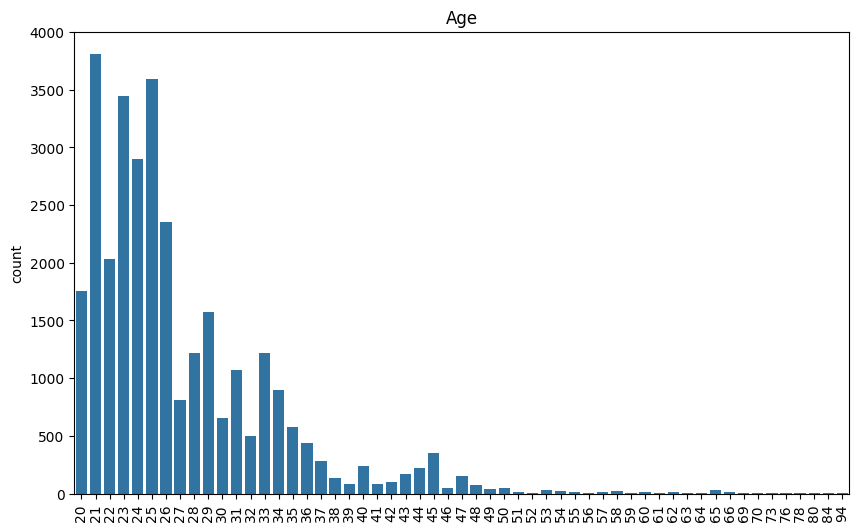

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(x=dataset['age'].unique(), y=dataset['age'].value_counts())
plt.xticks(rotation=90)
plt.title('Age')
plt.show()

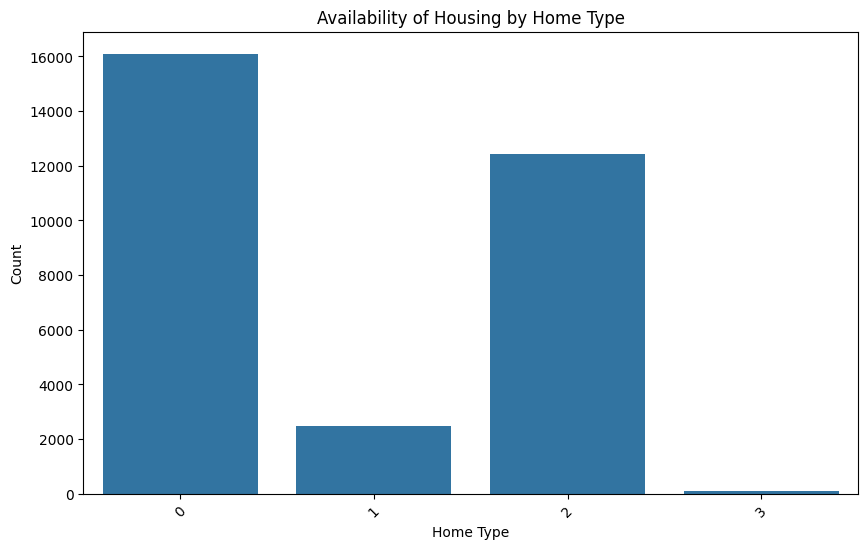

In [45]:
home_type_counts = dataset['home_type'].value_counts().reset_index()
home_type_counts.columns = ['home_type', 'count']  # Rename columns for clarity

plt.figure(figsize=(10, 6))
sns.barplot(x='home_type', y='count', data=home_type_counts)
plt.title('Availability of Housing by Home Type')
plt.xlabel('Home Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x labels if they overlap
plt.show()

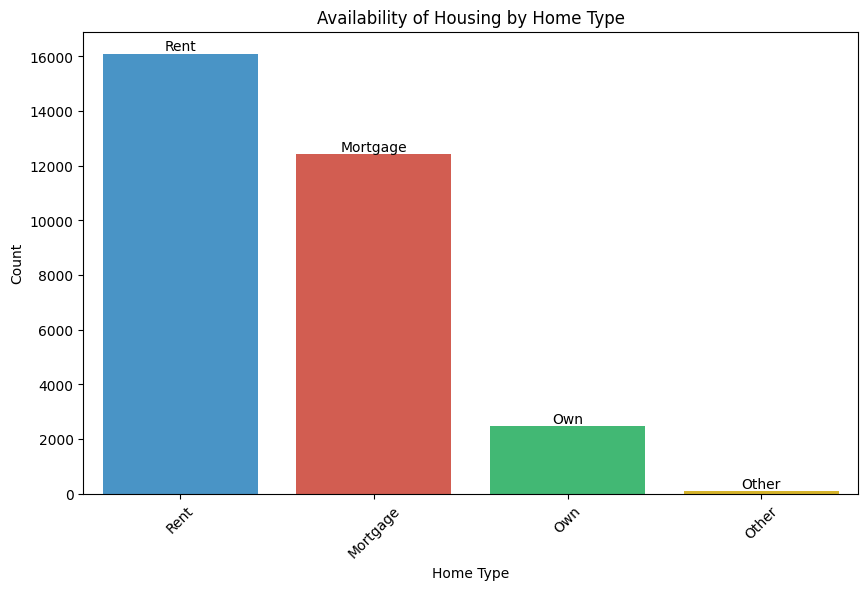

In [46]:
home_type_mapping = {0: 'Rent', 1: 'Own', 2: 'Mortgage', 3: 'Other'}
home_type_counts = dataset['home_type'].value_counts().reset_index()
home_type_counts.columns = ['home_type', 'count']  # Rename columns for clarity

# Replace the numeric home_type values with categorical names
home_type_counts['home_type'] = home_type_counts['home_type'].map(home_type_mapping)

plt.figure(figsize=(10, 6))

# Define a custom color palette for the bars
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f1c40f']  # Example colors for each category
sns.barplot(x='home_type', y='count', data=home_type_counts, palette=colors)

plt.title('Availability of Housing by Home Type')
plt.xlabel('Home Type')
plt.ylabel('Count')

# Add labels on top of each bar
for index, row in home_type_counts.iterrows():
    plt.text(row.name, row['count'], row['home_type'], color='black', ha="center", va="bottom")

plt.xticks(rotation=45)  # Rotate x labels if they overlap
plt.show()

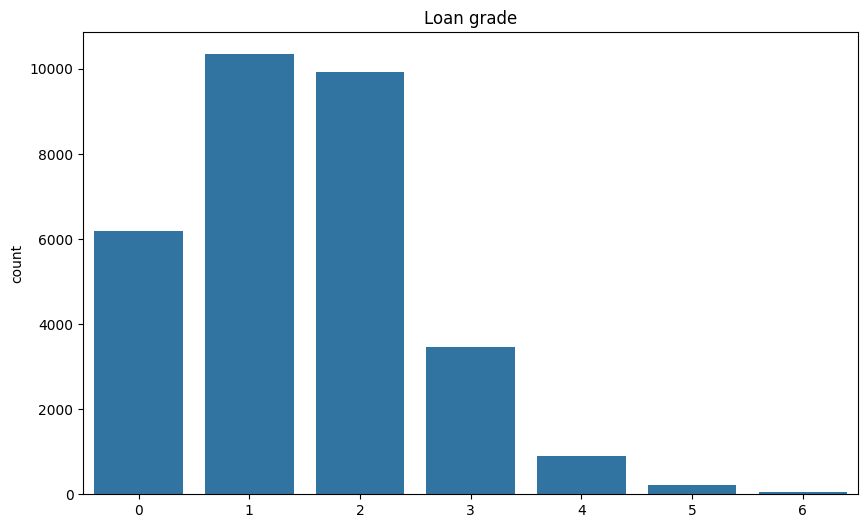

In [47]:
plt.figure(figsize=(10,6))
sns.barplot(x=dataset['loan_grade'].unique(), y=dataset['loan_grade'].value_counts())
plt.title('Loan grade')
plt.show()

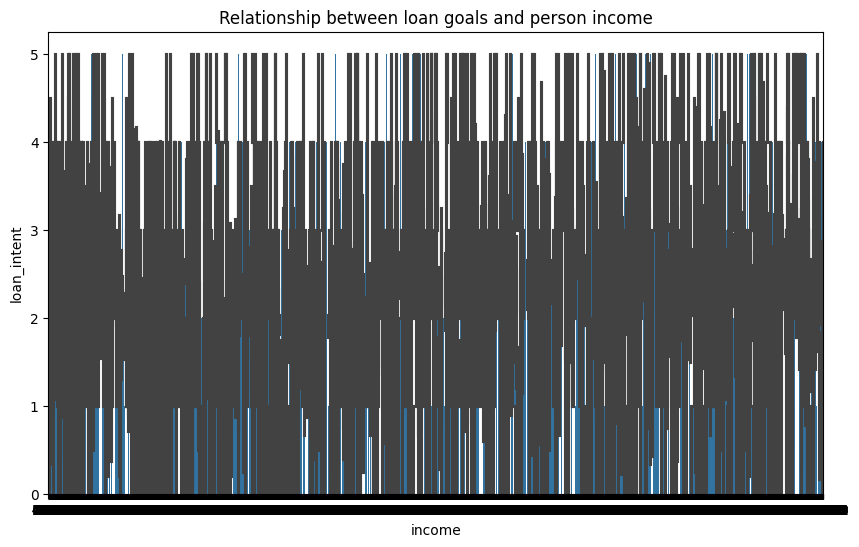

In [48]:
plt.figure(figsize=(10,6))
sns.barplot(x=dataset["income"],y=dataset["loan_intent"])
plt.title("Relationship between loan goals and person income")
plt.show()


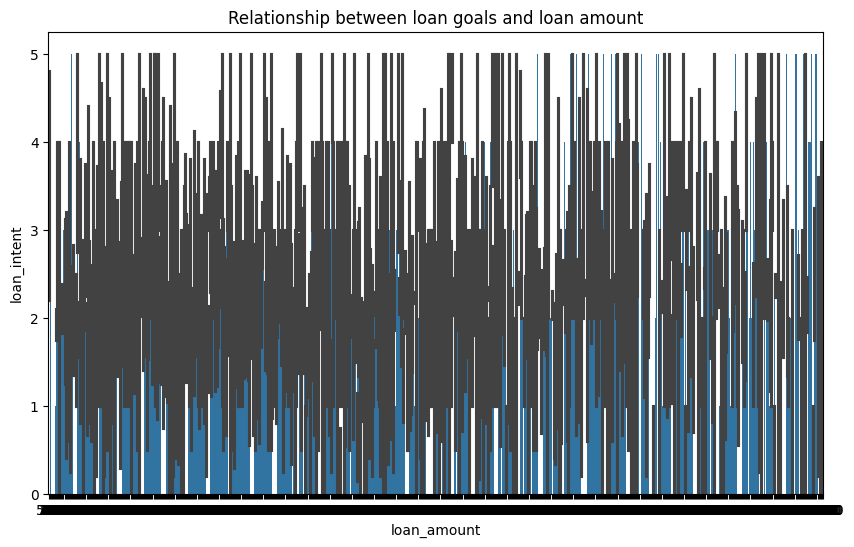

In [49]:
plt.figure(figsize=(10,6))
sns.barplot(x=dataset["loan_amount"],y=dataset["loan_intent"])
plt.title("Relationship between loan goals and loan amount")
plt.show()

In [50]:
#plt.figure(figsize=(10,6))
#sns.countplot(data = dataset, x = 'loan_grade', hue = 'loan_status')
#plt.title("Relationship between loan grade and loan status")
#plt.show()

In [51]:
#plt.figure(figsize=(10,6))
#sns.countplot(data = dataset, x = 'home_type', hue = 'loan_status')
#plt.title("Relationship between home ownership and loan status")
#plt.show()

In [52]:
#plt.figure(figsize=(10,6))
#sns.countplot(data = dataset, x = 'loan_intent', hue = 'loan_status')
#plt.xticks(rotation=90)
#plt.title("Relationship between loan goals and loan status")
#plt.show()

In [53]:
#plt.figure(figsize=(10,6))
#plt.pie(dataset['loan_status'].value_counts(), labels=['N', 'Y'], autopct='%1.1f%%')
#plt.title("Loan status")
#plt.show()

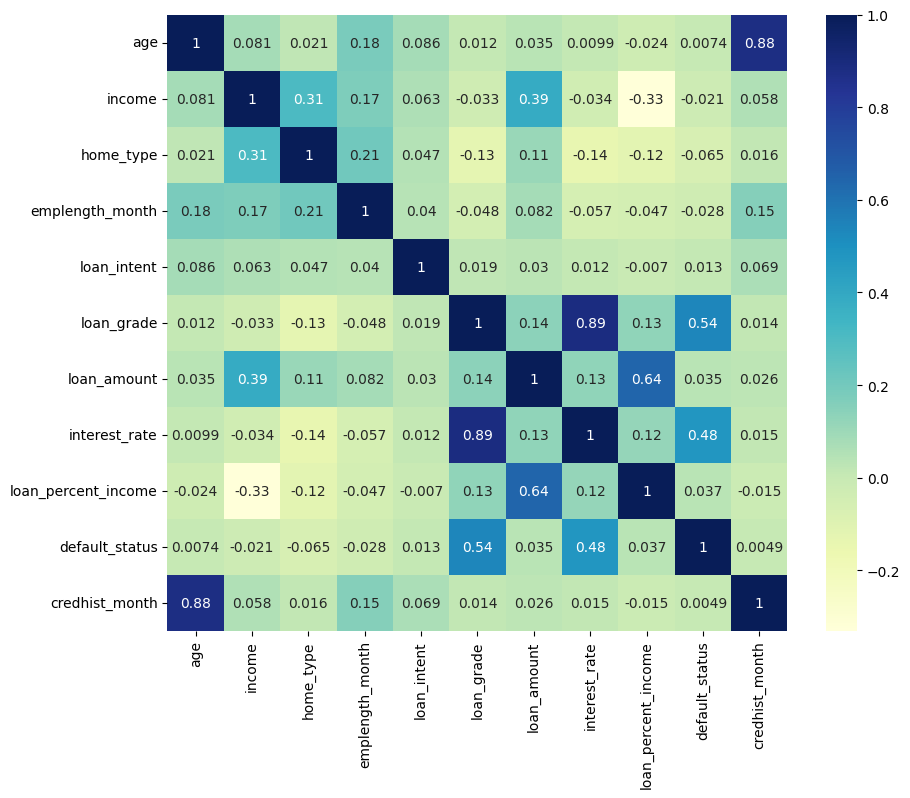

In [54]:
plt.figure(figsize=(10,8))
dataplot = sns.heatmap(dataset.corr(), cmap="YlGnBu", annot=True)
plt.show()

# Model creation using RFE

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.feature_selection import RFE

def rfeFeature(indep_X, dep_Y, n):
    rfelist = []
    selected_features={}

    # Define the tuned models
    log_model = LogisticRegression(solver='lbfgs', max_iter=5000, C=1.0)
    RF = RandomForestClassifier(n_estimators=200, criterion='entropy', max_depth=10, random_state=0)
    DT = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=0)
    svc_model = SVC(kernel='linear', C=1.0, class_weight='balanced', max_iter=5000, tol=1e-3, random_state=0)
    XG_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', learning_rate=0.1, n_estimators=200, max_depth=6, random_state=0)

    rfemodellist = [log_model, svc_model, RF, DT, XG_model]

    for model in rfemodellist:
        print(f"Processing model: {model}")
        log_rfe = RFE(estimator=model, n_features_to_select=n)
        log_fit = log_rfe.fit(indep_X, dep_Y)
        log_rfe_feature = log_fit.transform(indep_X)
        rfelist.append(log_rfe_feature)
        selected_columns=indep_X.columns[log_rfe.support_].tolist()
        selected_features[model.__class__.__name__]=selected_columns
        print("Transformed features with RFE:", log_rfe_feature.shape)
    return rfelist,selected_features


In [58]:
def split_scalar(indep_X,dep_Y):
        X_train, X_test, y_train, y_test = train_test_split(indep_X, dep_Y, test_size = 0.25, random_state = 0)
        #X_train, X_test, y_train, y_test = train_test_split(indep_X,dep_Y, test_size = 0.25, random_state = 0)
        
        #Feature Scaling
        #from sklearn.preprocessing import StandardScaler
        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)
        
        return X_train, X_test, y_train, y_test

In [59]:
def cm_prediction(classifier,X_test):
     y_pred = classifier.predict(X_test)
        
        # Making the Confusion Matrix
     from sklearn.metrics import confusion_matrix
     cm = confusion_matrix(y_test, y_pred)
        
     from sklearn.metrics import accuracy_score 
     from sklearn.metrics import classification_report 
        #from sklearn.metrics import confusion_matrix
        #cm = confusion_matrix(y_test, y_pred)
        
     Accuracy=accuracy_score(y_test, y_pred )
        
     report=classification_report(y_test, y_pred)
     return  classifier,Accuracy,report,X_test,y_test,cm

In [60]:
def logistic(X_train,y_train,X_test):       
        # Fitting K-NN to the Training set
        from sklearn.linear_model import LogisticRegression
        classifier = LogisticRegression(solver='lbfgs', max_iter=5000, C=1.0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm 

In [61]:
def svm_linear(X_train,y_train,X_test):
                
        from sklearn.svm import SVC
        classifier = SVC(kernel='linear', C=1.0, class_weight='balanced', max_iter=5000, tol=1e-3, random_state=0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm

In [62]:
def svm_NL(X_train,y_train,X_test):
                
        from sklearn.svm import SVC
        classifier = SVC(kernel = 'rbf', random_state = 0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm

In [63]:
def Navie(X_train,y_train,X_test):       
        # Fitting K-NN to the Training set
        from sklearn.naive_bayes import GaussianNB
        classifier = GaussianNB()
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm

In [64]:
def knn(X_train,y_train,X_test):
           
        # Fitting K-NN to the Training set
        from sklearn.neighbors import KNeighborsClassifier
        classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm

In [65]:
def Decision(X_train,y_train,X_test):
        
        # Fitting K-NN to the Training set
        from sklearn.tree import DecisionTreeClassifier
        classifier = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm

In [66]:
def XGBoost(X_train, y_train, X_test):
    from xgboost import XGBClassifier
    # Fitting XGBoost to the Training set
    classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss', learning_rate=0.1, n_estimators=200, max_depth=6, random_state=0)
    classifier.fit(X_train, y_train)
    classifier, Accuracy, report, X_test, y_test, cm = cm_prediction(classifier, X_test)
    return classifier, Accuracy, report, X_test, y_test, cm


In [67]:
def random(X_train,y_train,X_test):
        
        # Fitting K-NN to the Training set
        from sklearn.ensemble import RandomForestClassifier
        classifier = RandomForestClassifier(n_estimators=200, criterion='entropy', max_depth=10, random_state=0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm

In [68]:
def rfe_classification(acclog,accsvml,accsvmnl,accknn,accnav,accdes,accrf,accxg): 
    
    rfedataframe=pd.DataFrame(index=['Logistic','SVC','Random','DecisionTree','XGBoost'],columns=['Logistic','SVMl','SVMnl',
                                                                                        'KNN','Navie','Decision','Random','XGBoost'])

    for number,idex in enumerate(rfedataframe.index):
        
        rfedataframe['Logistic'][idex]=acclog[number]       
        rfedataframe['SVMl'][idex]=accsvml[number]
        rfedataframe['SVMnl'][idex]=accsvmnl[number]
        rfedataframe['KNN'][idex]=accknn[number]
        rfedataframe['Navie'][idex]=accnav[number]
        rfedataframe['Decision'][idex]=accdes[number]
        rfedataframe['Random'][idex]=accrf[number]
        rfedataframe['XGBoost'][idex]=accxg[number]
    return rfedataframe

In [69]:
dataset

,age,income,home_type,emplength_month,loan_intent,loan_grade,loan_amount,interest_rate,loan_percent_income,default_status,credhist_month
1,21,9600,1,60,0,1,1000,11.14,0.10,0,24
2,25,9600,2,12,1,2,5500,12.87,0.57,0,36
3,23,65500,0,48,1,2,35000,15.23,0.53,0,24
4,24,54400,0,96,1,2,35000,14.27,0.55,1,48
5,21,9900,1,24,2,0,2500,7.14,0.25,0,24
...,...,...,...,...,...,...,...,...,...,...,...
32575,52,64500,0,57,0,1,5000,11.26,0.08,0,240
32576,57,53000,2,12,3,2,5800,13.16,0.11,0,360
32577,54,120000,2,48,3,0,17625,7.49,0.15,0,228
32578,65,76000,0,36,5,1,35000,10.99,0.46,0,336


In [70]:
indep_X=dataset.drop('default_status', axis=1)
indep_X

,age,income,home_type,emplength_month,loan_intent,loan_grade,loan_amount,interest_rate,loan_percent_income,credhist_month
1,21,9600,1,60,0,1,1000,11.14,0.10,24
2,25,9600,2,12,1,2,5500,12.87,0.57,36
3,23,65500,0,48,1,2,35000,15.23,0.53,24
4,24,54400,0,96,1,2,35000,14.27,0.55,48
5,21,9900,1,24,2,0,2500,7.14,0.25,24
...,...,...,...,...,...,...,...,...,...,...
32575,52,64500,0,57,0,1,5000,11.26,0.08,240
32576,57,53000,2,12,3,2,5800,13.16,0.11,360
32577,54,120000,2,48,3,0,17625,7.49,0.15,228
32578,65,76000,0,36,5,1,35000,10.99,0.46,336


In [71]:
dep_Y=dataset['default_status']
dep_Y

1        0
2        0
3        0
4        1
5        0
        ..
32575    0
32576    0
32577    0
32578    0
32580    0
Name: default_status, Length: 31094, dtype: int64

In [72]:
rfelist,selected_features=rfeFeature(indep_X,dep_Y,7)       

acclog=[]
accsvml=[]
accsvmnl=[]
accknn=[]
accnav=[]
accdes=[]
accrf=[]
accxg=[]

for i in rfelist:   
    X_train, X_test, y_train, y_test=split_scalar(i,dep_Y)   
    
        
    classifier,Accuracy,report,X_test,y_test,cm=logistic(X_train,y_train,X_test)
    acclog.append(Accuracy)
    
    classifier,Accuracy,report,X_test,y_test,cm=svm_linear(X_train,y_train,X_test)  
    accsvml.append(Accuracy)
    
    classifier,Accuracy,report,X_test,y_test,cm=svm_NL(X_train,y_train,X_test)  
    accsvmnl.append(Accuracy)
    
    classifier,Accuracy,report,X_test,y_test,cm=knn(X_train,y_train,X_test)  
    accknn.append(Accuracy)
    
    classifier,Accuracy,report,X_test,y_test,cm=Navie(X_train,y_train,X_test)  
    accnav.append(Accuracy)
    
    classifier,Accuracy,report,X_test,y_test,cm=Decision(X_train,y_train,X_test)  
    accdes.append(Accuracy)
    
    classifier,Accuracy,report,X_test,y_test,cm=random(X_train,y_train,X_test)  
    accrf.append(Accuracy)
    classifier,Accuracy,report,X_test,y_test,cm=XGBoost(X_train,y_train,X_test)  
    accxg.append(Accuracy)
    
result=rfe_classification(acclog,accsvml,accsvmnl,accknn,accnav,accdes,accrf,accxg)

print ('7 RFE classification result is:\n',result)

Processing model: LogisticRegression(max_iter=5000)
Transformed features with RFE: (31094, 7)
Processing model: SVC(class_weight='balanced', kernel='linear', max_iter=5000, random_state=0)
Transformed features with RFE: (31094, 7)
Processing model: RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=200,
                       random_state=0)
Transformed features with RFE: (31094, 7)
Processing model: DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                       random_state=0)
Transformed features with RFE: (31094, 7)
Processing model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
     

In [73]:
print('Selected_Features:')
for model_name,features in selected_features.items():
    print(f'{model_name}:{features}')

Selected_Features:
LogisticRegression:['age', 'home_type', 'emplength_month', 'loan_grade', 'interest_rate', 'loan_percent_income', 'credhist_month']
SVC:['age', 'home_type', 'emplength_month', 'loan_intent', 'loan_grade', 'interest_rate', 'credhist_month']
RandomForestClassifier:['age', 'income', 'emplength_month', 'loan_grade', 'loan_amount', 'interest_rate', 'loan_percent_income']
DecisionTreeClassifier:['age', 'income', 'emplength_month', 'loan_grade', 'loan_amount', 'interest_rate', 'loan_percent_income']
XGBClassifier:['income', 'home_type', 'loan_intent', 'loan_grade', 'loan_amount', 'interest_rate', 'loan_percent_income']


In [86]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Instantiate the model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)

# Define the parameter grid
param_grid = {
    'n_estimators': [100],               # Number of boosting rounds
    'max_depth': [5, 10],                      # Maximum tree depth for base learners
    'learning_rate': [0.01, 0.1, 0.2],            # Learning rate (eta)
    'subsample': [0.6, 0.8, 1.0],                 # Fraction of samples used per tree
    'colsample_bytree': [0.6, 0.8, 1.0],          # Fraction of features used per tree
    'gamma': [0, 0.1, 0.2],                       # Minimum loss reduction to split
    'reg_alpha': [0, 0.01, 0.1],                  # L1 regularization term
    'reg_lambda': [1, 1.5, 2],                    # L2 regularization term
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='f1',     # Adjust depending on your evaluation metric
    cv=5,             # 5-fold cross-validation
    n_jobs=-1,        # Use all available cores
    verbose=3
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Output best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Retrieve the best model
best_xgb = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_xgb.predict(X_test)


Fitting 5 folds for each of 1458 candidates, totalling 7290 fits
Best Parameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'reg_alpha': 0.1, 'reg_lambda': 1.5, 'subsample': 1.0}
Best Score: 0.5242428164351948


Accuracy: 0.8248006174427579
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.89      6397
           1       0.51      0.48      0.49      1377

    accuracy                           0.82      7774
   macro avg       0.70      0.69      0.69      7774
weighted avg       0.82      0.82      0.82      7774



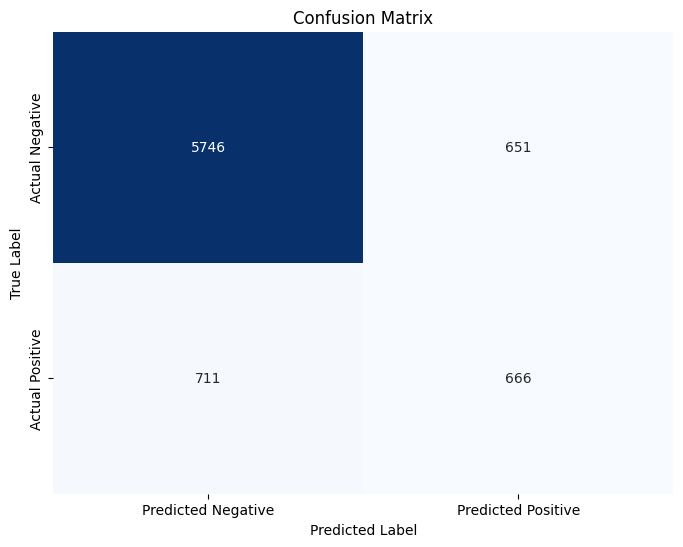

In [87]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions using the best model from GridSearchCV
y_pred = best_xgb.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print out accuracy and classification report for more insight
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [76]:
import pickle
filename='Credit_Risk_prediction.sav'
pickle.dump(grid_search,open(filename,'wb'))

In [77]:
loaded_model=pickle.load(open('Credit_Risk_prediction.sav','rb'))

In [79]:
#result=loaded_model.predict([[income, home_type, loan_grade, loan_amount, interest_rate, loan_status, loan_percent_income]])

In [97]:
# Map person_home_ownership categories to integers
'''home_type_map = {'RENT': 0, 'OWN': 1, 'MORTGAGE': 2, 'OTHER': 3}
dataset['person_home_ownership'] = dataset['person_home_ownership'].map(home_ownership_map)

loan_intent_map={'EDUCATION':0,'MEDICAL':1,'VENTURE':2,'PERSONAL':3,'DEBTCONSOLIDATION':4,'HOMEIMPROVEMENT':5}
dataset['loan_intent']=dataset['loan_intent'].map(loan_intent)

loan_grade_map={'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6}
dataset['loan_grade']=dataset['loan_grade'].map(loan_grade)

# Convert cb_person_default_on_file to binary values (e.g., 'Y' = 1, 'N' = 0)
dataset['cb_person_default_on_file'] = dataset['cb_person_default_on_file'].map({'Y': 1, 'N': 0})'''



def get_categorical_prediction(prediction):
    return 'Risk' if prediction == 1 else 'No Risk'

# Define mappings for categorical variables
home_type_map = {'RENT': 0, 'OWN': 1, 'MORTGAGE': 2, 'OTHER': 3}
loan_grade_map={'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6}
loan_intent_map={'EDUCATION':0,'MEDICAL':1,'VENTURE':2,'PERSONAL':3,'DEBTCONSOLIDATION':4,'HOMEIMPROVEMENT':5}

# Take user inputs
income = float(input("Income: "))
home_type = input("Home type (rent/own/mortgage): ").upper()
loan_grade = input("Loan grade (A-E): ").upper()
loan_amount = float(input("Loan amount: "))
interest_rate = float(input("Interest rate: "))
loan_percent_income = float(input("Loan percent income: "))
loan_intent = input("Loan intent (education/medical/business/personal/debt_consolidation): ").upper()

# Map the alphabetic inputs to numerical values using the dictionaries
home_type_num = home_type_map.get(home_type, 0)  # default to 0 if not found
loan_grade_num = loan_grade_map.get(loan_grade, 0)
loan_intent_num = loan_intent_map.get(loan_intent, 0)

# Define the input data array for prediction
input_data = np.array([[income, home_type_num, loan_grade_num, loan_amount, interest_rate, loan_percent_income, loan_intent_num]], dtype=float)

# Make the prediction with the loaded model
result = loaded_model.predict(input_data)

# Interpret and print the result
prediction_category = get_categorical_prediction(result[0])
print("Prediction:", prediction_category)
print('There is',prediction_category,'on this loan application')

Income:  10000
Home type (rent/own/mortgage):  rent
Loan grade (A-E):  c
Loan amount:  200000000
Interest rate:  25
Loan percent income:  .18
Loan intent (education/medical/business/personal/debt_consolidation):  medical


Prediction: Risk
There is Risk on this loan application
